In [1]:

import pandas as pd 


import numpy as np
import seaborn as sns


from warnings import filterwarnings
filterwarnings('ignore')


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from scipy import stats


from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare


import statsmodels.stats.multicomp as mc


In [28]:
df=pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [29]:
df.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [30]:
df.shape

(2000, 15)

In [31]:
df.isnull().sum()/len(df) *100

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [32]:
df.dropna(inplace=True)

####  a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [35]:
samp= df['Age'].sample(n=200)
samp

1168    28
1887    28
1867    31
1850    30
863     30
        ..
668     28
1991    23
1626    32
669     27
1679    27
Name: Age, Length: 200, dtype: int64

In [36]:
samp_mean=np.mean(samp)
std_err= np.std(samp)/np.sqrt(200)
print('sample mean ',samp_mean)
print('sample std ',std_err)

sample mean  27.215
sample std  0.2756698659628941


In [37]:
pop_mean=df['Age'].mean()
pop_std=df['Age'].std()
print('population mean',pop_mean)
print('population standard deviation',pop_std)

population mean 27.215547703180214
population standard deviation 3.8525185996930396


As the sample size increases the distribution tends to normal distribution.

#### b)	Is there any evidence that the players overall rating is greater than 80?

In [34]:
df['Overall_rating']

0       94
1       94
2       92
3       91
4       91
        ..
1995    75
1996    75
1997    75
1998    75
1999    75
Name: Overall_rating, Length: 2000, dtype: int64

In [38]:
loc=df['Overall_rating'].mean()
scale=df['Overall_rating'].std()

print('players overall rating is greater than 80: ',stats.norm.sf(80,loc=loc ,scale=scale))

players overall rating is greater than 80:  0.29361212253444613


According to this data, there is 29% chance is there to the rating to be greater than 80.

#### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [39]:
right=df[df['Preferred Foot']=='Right']['Potential']
left=df[df['Preferred Foot']=='Left']['Potential']

<AxesSubplot:xlabel='Potential', ylabel='Density'>

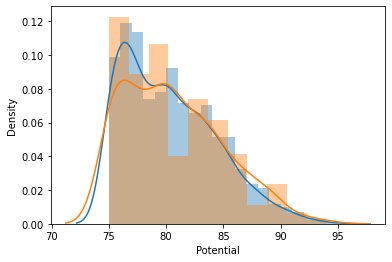

In [40]:
sns.distplot(right)
sns.distplot(left)

In [103]:
# checking the normality

# h0: data is normal
# h1: data is not normal

print(stats.shapiro(right))
print(stats.shapiro(left))

ShapiroResult(statistic=0.9369121193885803, pvalue=5.342442151473519e-25)
ShapiroResult(statistic=0.9422042369842529, pvalue=1.7173475098594682e-12)


assuming, data is normal we perform equal variance test.

In [41]:
# checking variance

# h0: data has equal variance
# h1: data doesnt have equal variance

print(stats.levene(right,left))

LeveneResult(statistic=1.5665635192734586, pvalue=0.2108546965781491)


the p value is greater than alpha value and accept null value. Our null value specify that data has
equal variance

In [42]:
# h0: preferred foot has no impact on potential
# h1: preferred foot has impact on potential

In [43]:
print(stats.f_oneway(right,left))

F_onewayResult(statistic=2.6621845772621833, pvalue=0.10291861885209323)


here the p value is greater than alpha value, so we fail to reject the null and we can say that preferred foot has no 
impact on potential.

#### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [44]:
print(stats.pearsonr(df['Overall_rating'],df['Potential']))

(0.732085835890994, 0.0)


here the correlation value is 0.73, so we can assume that the Overall rating and potential are highly positively correlated.

#### e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis

In [45]:
df['Skill Moves'].value_counts()

3    818
4    540
2    392
1    192
5     39
Name: Skill Moves, dtype: int64

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

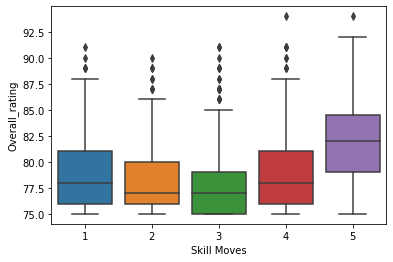

In [46]:
sns.boxplot(df['Skill Moves'],df['Overall_rating'])

In [47]:
print(stats.pearsonr(df['Skill Moves'],df['Overall_rating']))

(0.08303643058332785, 0.00021570230856720446)


While performing correlation we can identify that skill move and overall rating have lesser relation with each other.

In [48]:
df1=pd.read_csv('phone.csv')
df1

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [49]:
df1.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

#### a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [50]:
loc=df1.duration.mean()
scale=df1.duration.std()

In [51]:
# 95% confidence Interval

print(stats.norm.interval(.95,loc=loc,scale=scale))

(54.75853844773455, 233.85133267193635)


In [52]:
# 99 % confidence interval

print(stats.norm.interval(.99,loc=loc,scale=scale))

(26.621021198161927, 261.988849921509)


99 % is the wider interval compared to 95%.

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [53]:
# h0: data is normal
# h1: data is not normal

In [54]:
stats.shapiro(df1.network.value_counts())

ShapiroResult(statistic=0.8885776400566101, pvalue=0.26732590794563293)

here p value is greater than alpha value, so we conclude that data is normal

#### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

In [55]:
a= df1.groupby(df1['network'])['duration'].sum()
a

network
Meteor       12158.860017
Tesco        12204.150333
Three        30413.457328
Vodafone     32165.348426
data         21145.296417
landline      5947.940920
voicemail     4294.993719
Name: duration, dtype: float64

<AxesSubplot:xlabel='network', ylabel='duration'>

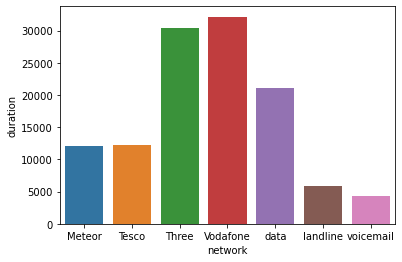

In [56]:
sns.barplot(a.index,a)

From this diagram we can conclude that vodafone and three has most duration.

#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [91]:
data=df1[df1['item']=='data']['duration']
call=df1[df1['item']=='call']['duration']
sms=df1[df1['item']=='sms']['duration']

In [92]:
print(stats.shapiro(data))
print(stats.shapiro(call))
print(stats.shapiro(sms))

ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596)
ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708)
ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526)


In [93]:
print(stats.levene(data,call,sms))

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)


In [ ]:
# h0: item and duration is independent
# h1: item and duration is dependent

In [94]:
print(stats.f_oneway(data,call,sms))

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)


from the test result we can say that p value is greater than alpha value,so we accept the null which means they are independent.

#### e)	Perform statistical tests to identify the relation between network and network_type

In [97]:
table=pd.crosstab(df1['network'],df1['network_type'])
observed=table.values
observed

array([[  0,   0,  87,   0],
       [  0,   0,  84,   0],
       [  0,   0, 215,   0],
       [  0,   0, 215,   0],
       [150,   0,   0,   0],
       [  0,  42,   0,   0],
       [  0,   0,   0,  27]], dtype=int64)

In [ ]:
# h0: network and network_type is independet
# h1: network and network_type is dependent

In [98]:
stats.chi2_contingency(observed=observed,correction=False)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [ ]:
here p value is less than alpha value, so we accept the alternate hypothesis.